In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", 
                        category=UserWarning, message=".* version 1.0.02 when using version 1.3.0.",
                        module='sklearn')
%matplotlib inline
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
#import missingno
from sklearn.pipeline import Pipeline
from collections import OrderedDict
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    roc_auc_score,
    recall_score,
    precision_score,
    confusion_matrix,
    #plot_confusion_matrix,
    make_scorer,
    precision_recall_curve,
    roc_curve,
)
# =======================================
# Step 1: Import Libraries
# =======================================
import pandas as pd
import numpy as np

# Scikit-learn ML tools
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_curve, 
    accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
!pip install tabulate

You should consider upgrading via the 'C:\Users\hp\whmatplotlib_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
df = pd.read_csv("cbalanced_gbv_data.csv")

In [5]:
df.head(2)

,who_survivor/victim_stay_with,victim_lives_with,survivor_age,survivor_sex,marital_status,employment_status_main,employment_status_victim_main,PLWD,PLHIV,female_sex_worker,IDP,drug_user,widow,out_of_school_child,minor,household_help,child_apprentice,orphans,not_applicable,other_vulnerability,educational_status,incident_time_of_day,incident_location,sexual_assault,physical_assault,financial_economic,online_cyber,rape,defilement,forced_marriage,denial_of_resources,psychological_emotional_abuse,female_genital_mutilation,violation_property_inheritance_rights,child_abuse_neglect,other_violence,was_the_violence_fatal,perpetrator_sex,perpetrator_age,victim_perpetrator_relationship,contact_channel,who_reported_the_incident,seeks_justice,vulnerability_target
0,-1,2,21.0,0,0,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,-1,0,1,26,-1,1,1,0,1
1,3,2,19.0,1,-1,-1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,-1,0,1,51,1,3,3,1,1


In [6]:
# Rename columns in df
df = df.rename(columns={
    "not_applicable": "vul_cat_if_applicable",
    "employment_status_victim_main": "individual_employment_status",
    "employment_status_main": "househead_employment_status",
    #"PLHIV": "living_with_HIV_status",
    "who_survivor/victim_stay_with": "current_living_arrangement",
    "victim_lives_with": "individual_lives_with",
    "survivor_sex": "gender",
    "survivor_age": "individual_age"
    #"IDP": "internally_displaced_person_status",
    #"marital status": "marital_status",
    #"educational status": "educational_attainment_level"
})

# Check updated columns
print(df.columns.tolist())

['current_living_arrangement', 'individual_lives_with', 'individual_age', 'gender', 'marital_status', 'househead_employment_status', 'individual_employment_status', 'PLWD', 'PLHIV', 'female_sex_worker', 'IDP', 'drug_user', 'widow', 'out_of_school_child', 'minor', 'household_help', 'child_apprentice', 'orphans', 'vul_cat_if_applicable', 'other_vulnerability', 'educational_status', 'incident_time_of_day', 'incident_location', 'sexual_assault', 'physical_assault', 'financial_economic', 'online_cyber', 'rape', 'defilement', 'forced_marriage', 'denial_of_resources', 'psychological_emotional_abuse', 'female_genital_mutilation', 'violation_property_inheritance_rights', 'child_abuse_neglect', 'other_violence', 'was_the_violence_fatal', 'perpetrator_sex', 'perpetrator_age', 'victim_perpetrator_relationship', 'contact_channel', 'who_reported_the_incident', 'seeks_justice', 'vulnerability_target']


In [7]:
df1 = df.copy()

In [8]:
df['vulnerability_target'].value_counts()

vulnerability_target
0    31002
1    30348
Name: count, dtype: int64

In [9]:
# List of columns to drop
columns_to_drop = [
    "incident_time_of_day",
    "vulnerability_score",
    "organisation_type",
    "organisation_state",
    "organisation_lga",
    "location_state",
    "location_lga",
    "location_ward_encoded",
    "incident_location",
    "sexual_assault",
    "physical_assault",
    "financial_economic",
    "online_cyber",
    "rape",
    "defilement",
    "forced_marriage",
    "denial_of_resources",
    "psychological_emotional_abuse",
    "female_genital_mutilation",
    "violation_property_inheritance_rights",
    "child_abuse_neglect",
    "other_violence",
    "was_the_violence_fatal",
    "perpetrator_sex",
    "perpetrator_age",
    "victim_perpetrator_relationship",
    "contact_channel",
    "who_reported_the_incident",
    "seeks_justice",
    "incident_year",
    "incident_month",
    "incident_day",
    "reported_year",
    "reported_month",
    "minor",
    "widow",
    "_tmp_vulnerable",
    "Unnamed: 0",
    "reported_day"
]

# Drop the columns
df = df.drop(columns=columns_to_drop, errors="ignore")

In [10]:
df.head(2)

,current_living_arrangement,individual_lives_with,individual_age,gender,marital_status,househead_employment_status,individual_employment_status,PLWD,PLHIV,female_sex_worker,IDP,drug_user,out_of_school_child,household_help,child_apprentice,orphans,vul_cat_if_applicable,other_vulnerability,educational_status,vulnerability_target
0,-1,2,21.0,0,0,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,3,2,19.0,1,-1,-1,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [11]:
df.to_csv("cldataRbal_data.csv", index=False)

In [12]:
df.shape

(61350, 20)

In [13]:
df1.shape

(61350, 44)

In [14]:
target = "vulnerability_target"

X = df.drop(columns=[target])
y = df[target]

In [15]:
print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Feature shape: (61350, 19)
Target distribution:
 vulnerability_target
0    31002
1    30348
Name: count, dtype: int64


In [16]:
# =======================================
# Step 3: Train-Test Split
# =======================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (49080, 19)
Testing shape: (12270, 19)


In [17]:
# Scikit-learn ML tools
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_curve, 
    accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# =======================================
# Step 4: Logistic Regression + Hyperparameter Tuning
# =======================================

# Pipeline: Scaling + Logistic Regression
pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("logreg", LogisticRegression(solver="liblinear", max_iter=500))
])

# Hyperparameters to tune
param_grid = {
    "logreg__penalty": ["l1", "l2"],       # Regularization type
    "logreg__C": [0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    "logreg__class_weight": [None, "balanced"] # Handle class balance
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1",  # F1 because we care about balance between precision & recall
    cv=cv,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV Score (F1):", grid.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'logreg__C': 10, 'logreg__class_weight': None, 'logreg__penalty': 'l2'}
Best CV Score (F1): 0.9140911022901193


In [19]:
# =======================================
# Step 5: Evaluation on Test Data
# =======================================

best_model = grid.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # for AUC & confidence

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# AUC Score
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)



Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      6200
           1       0.91      0.91      0.91      6070

    accuracy                           0.91     12270
   macro avg       0.91      0.91      0.91     12270
weighted avg       0.91      0.91      0.91     12270

Accuracy: 0.9141809290953545
ROC AUC: 0.9673094807886485


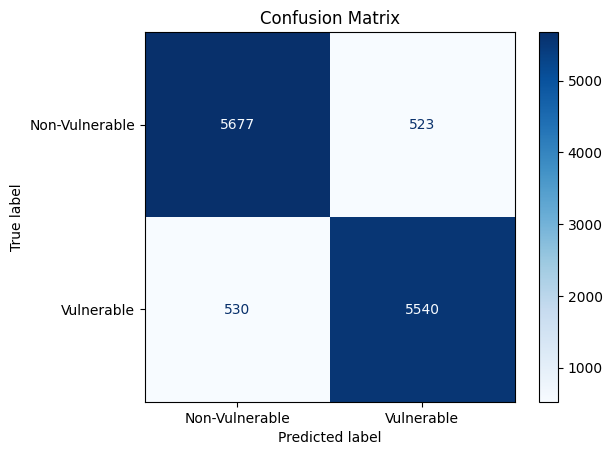

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Vulnerable", "Vulnerable"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

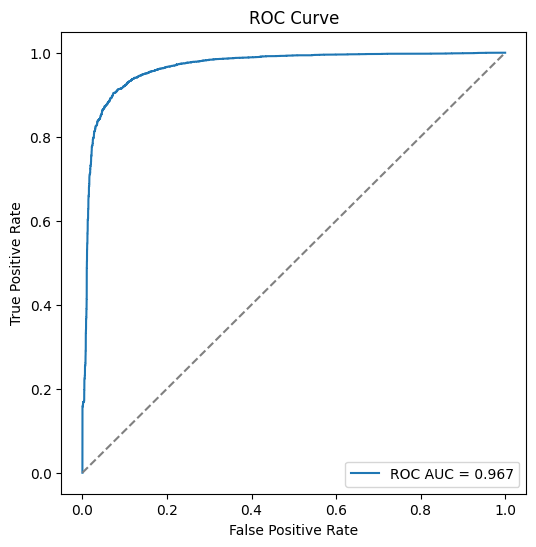

In [21]:
# =======================================
# Step 6: ROC & Precision-Recall Curves
# =======================================

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



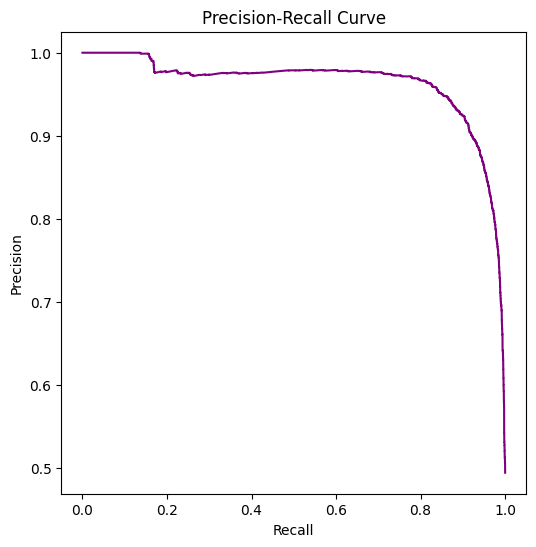

In [22]:
# Precision-Recall Curve
prec, rec, thr = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 6))
plt.plot(rec, prec, color="purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [23]:
# =======================================
# Step 5: Evaluation on Test Data (Custom Threshold = 0.4)
# =======================================

best_model = grid.best_estimator_

# Predicted probabilities (not hard labels yet)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Apply custom threshold = 0.4
y_pred_custom = (y_proba >= 0.4).astype(int)

# Classification Report
print("\nClassification Report (Threshold = 0.4):\n", classification_report(y_test, y_pred_custom))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_custom))

# AUC Score (threshold independent)
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)




Classification Report (Threshold = 0.4):
               precision    recall  f1-score   support

           0       0.93      0.88      0.91      6200
           1       0.89      0.94      0.91      6070

    accuracy                           0.91     12270
   macro avg       0.91      0.91      0.91     12270
weighted avg       0.91      0.91      0.91     12270

Accuracy: 0.9089649551752241
ROC AUC: 0.9673094807886485


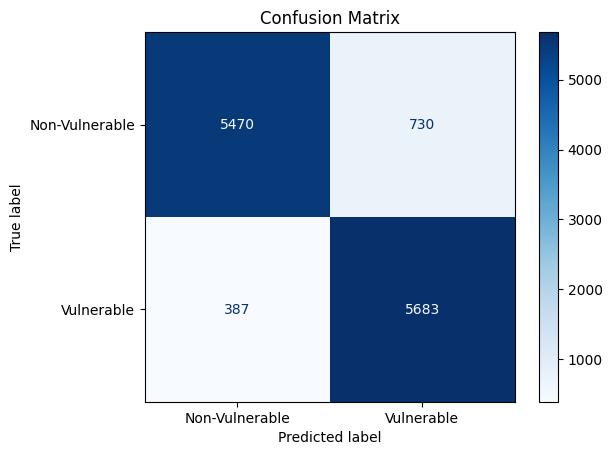

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Vulnerable", "Vulnerable"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [25]:
# =======================================
# Step 7: Feature Importance (Logistic Regression Coefficients)
# =======================================

# Extract best model (from pipeline)
best_model = grid.best_estimator_

# Get feature names (from X)
feature_names = X.columns

# Extract coefficients (from logistic regression step in pipeline)
coefficients = best_model.named_steps["logreg"].coef_[0]

# Create DataFrame
feat_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Absolute_Importance": np.abs(coefficients)  # strength of effect
})

# Sort by absolute importance
feat_importance = feat_importance.sort_values(by="Absolute_Importance", ascending=False)

# Display top 10
print("\nTop 10 Important Features:\n", feat_importance.head(10))




Top 10 Important Features:
                          Feature  Coefficient  Absolute_Importance
13                household_help     2.103506             2.103506
2                 individual_age    -1.890769             1.890769
3                         gender    -1.874448             1.874448
16         vul_cat_if_applicable    -0.814907             0.814907
10                           IDP     0.766754             0.766754
0     current_living_arrangement    -0.745410             0.745410
18            educational_status    -0.644251             0.644251
1          individual_lives_with    -0.548149             0.548149
4                 marital_status    -0.535717             0.535717
6   individual_employment_status    -0.481410             0.481410


In [26]:
# model with random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [28]:
# STEP 3: Baseline Random Forest
rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_baseline.fit(X_train, y_train)

# Predictions
y_rf_pred_baseline = rf_baseline.predict(X_test)
y_rf_prob_baseline = rf_baseline.predict_proba(X_test)[:, 1]

In [29]:
# STEP 5: Cross-validation setup
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
# STEP 6: Parameter distributions for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [31]:
# STEP 7: RandomizedSearchCV (lighter version for speed)
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=rf_param_dist,
    n_iter=10,                 # sample only 10 random combos
    cv=3,                     
    scoring= 'f1',
    refit='f1_macro',
    n_jobs=-1,
    verbose=2,
    random_state=42
)


In [32]:
rf_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, refit='f1_macro', scoring='f1', verbose=2)

In [33]:
print("Best Parameters from RandomizedSearchCV:\n", rf_random_search.best_params_)
print("Best CV F1 Score:", rf_random_search.best_score_)

Best Parameters from RandomizedSearchCV:
 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best CV F1 Score: 0.9840118169360528


In [34]:
#evaluation

In [35]:
# STEP 10: Best tuned model
rf_best = rf_random_search.best_estimator_

# Predictions
y_rf_pred_best = rf_best.predict(X_test)
y_rf_prob_best = rf_best.predict_proba(X_test)[:, 1]

In [36]:
# STEP 11: Evaluation
print("=== TUNED RANDOM FOREST ===")
print("Accuracy:", accuracy_score(y_test, y_rf_pred_best))
print("Precision:", precision_score(y_test, y_rf_pred_best))
print("Recall:", recall_score(y_test, y_rf_pred_best))
print("F1 Score:", f1_score(y_test, y_rf_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_rf_prob_best))

print("\nClassification Report:\n", classification_report(y_test, y_rf_pred_best))

=== TUNED RANDOM FOREST ===
Accuracy: 0.9867970660146699
Precision: 0.9834697217675941
Recall: 0.9899505766062603
F1 Score: 0.9866995073891626
ROC-AUC: 0.9970038396131158

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      6200
           1       0.98      0.99      0.99      6070

    accuracy                           0.99     12270
   macro avg       0.99      0.99      0.99     12270
weighted avg       0.99      0.99      0.99     12270



In [37]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [38]:
# --- STEP A: Evaluate TRAIN vs TEST performance ---
print("\n=== TRAIN vs TEST PERFORMANCE ===")

# Training predictions
y_rf_pred_train = rf_best.predict(X_train)
y_rf_prob_train = rf_best.predict_proba(X_train)[:, 1]

print("Train Performance:")
print("Accuracy:", accuracy_score(y_train, y_rf_pred_train))
print("Precision:", precision_score(y_train, y_rf_pred_train))
print("Recall:", recall_score(y_train, y_rf_pred_train))
print("F1 Score:", f1_score(y_train, y_rf_pred_train))
print("ROC-AUC:", roc_auc_score(y_train, y_rf_prob_train))


=== TRAIN vs TEST PERFORMANCE ===
Train Performance:
Accuracy: 0.9924205378973106
Precision: 0.9881963731416435
Recall: 0.9965812669906912
F1 Score: 0.9923711086501784
ROC-AUC: 0.999566808018925


In [39]:

print("\nTest Performance:")
print("Accuracy:", accuracy_score(y_test, y_rf_pred_best))
print("Precision:", precision_score(y_test, y_rf_pred_best))
print("Recall:", recall_score(y_test, y_rf_pred_best))
print("F1 Score:", f1_score(y_test, y_rf_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_rf_prob_best))



Test Performance:
Accuracy: 0.9867970660146699
Precision: 0.9834697217675941
Recall: 0.9899505766062603
F1 Score: 0.9866995073891626
ROC-AUC: 0.9970038396131158


In [40]:
# --- STEP B: 5-Fold Stratified Cross-Validation on tuned model ---
print("\n=== 5-FOLD CROSS-VALIDATION (Stratified) ===")

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(
    rf_best,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
    return_train_score=True,
    n_jobs=-1
)

# Report mean ± std for each metric
for metric in ["train_accuracy", "train_precision", "train_recall", "train_f1", "train_roc_auc",
               "test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]:
    print(f"{metric}: {cv_results[metric].mean():.4f} ± {cv_results[metric].std():.4f}")



=== 5-FOLD CROSS-VALIDATION (Stratified) ===
train_accuracy: 0.9927 ± 0.0002
train_precision: 0.9891 ± 0.0005
train_recall: 0.9961 ± 0.0003
train_f1: 0.9926 ± 0.0002
train_roc_auc: 0.9996 ± 0.0000
test_accuracy: 0.9844 ± 0.0013
test_precision: 0.9814 ± 0.0012
test_recall: 0.9871 ± 0.0019
test_f1: 0.9842 ± 0.0013
test_roc_auc: 0.9968 ± 0.0003


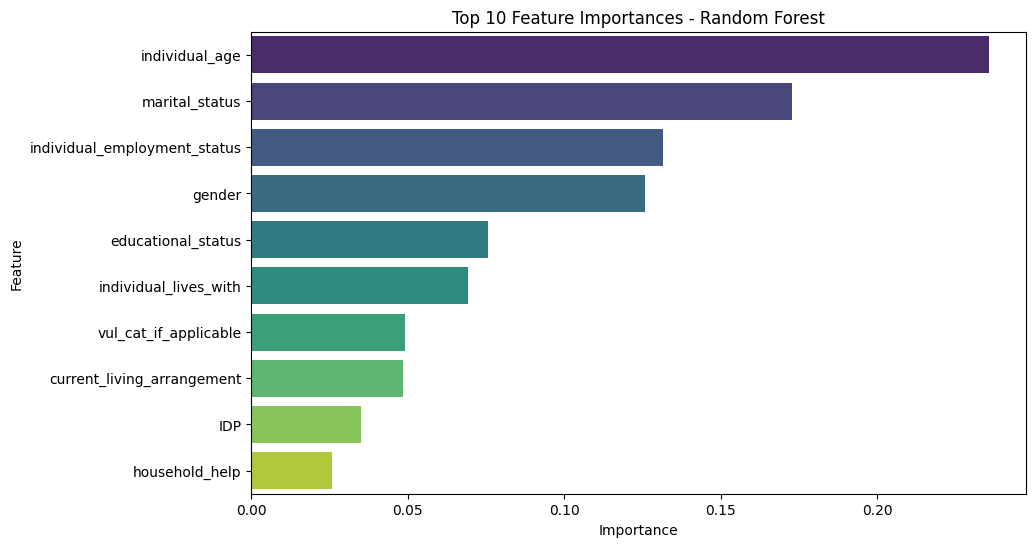

In [41]:
# STEP 14: Feature Importance
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [42]:
#building model with xgboost

In [45]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

In [46]:
# Step 3: Define baseline XGBoost model
xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",  
    use_label_encoder=False,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

In [47]:
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

In [48]:
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,     
    scoring="f1",           
    cv=3,                  
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [49]:
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [50]:
print("Best Parameters:", xgb_random.best_params_)

best_xgb = xgb_random.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Confusion Matrix & Report
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# ROC-AUC
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))


Best Parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
[[6109   91]
 [  64 6006]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6200
           1       0.99      0.99      0.99      6070

    accuracy                           0.99     12270
   macro avg       0.99      0.99      0.99     12270
weighted avg       0.99      0.99      0.99     12270

ROC-AUC Score: 0.9981910506456928


In [51]:
print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))


Confusion Matrix (XGBoost):
[[6109   91]
 [  64 6006]]


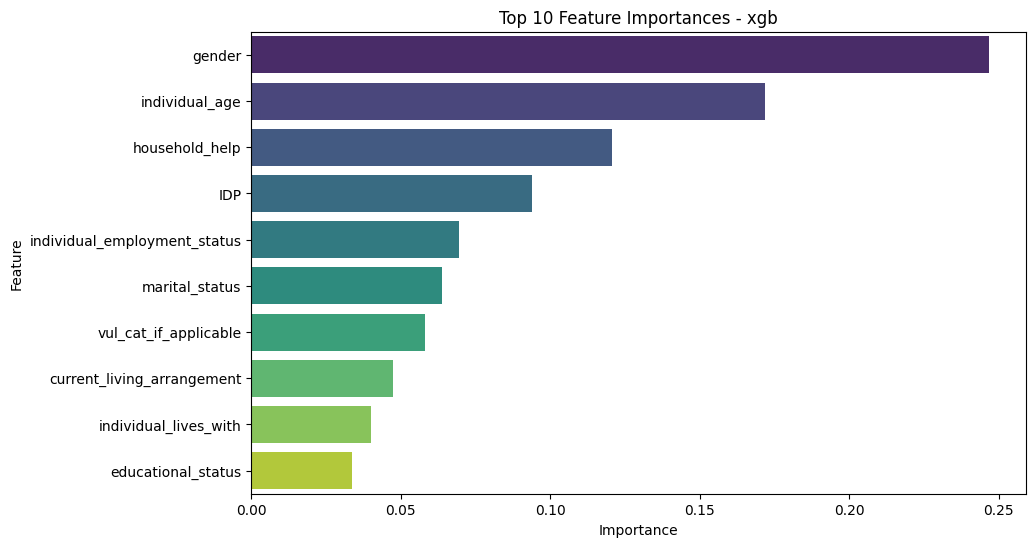

In [52]:
# STEP 14: Feature Importance
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")
plt.title("Top 10 Feature Importances - xgb")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [58]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support

In [59]:
# Step 3: Define baseline CatBoost model
cat_model = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    random_state=42,
    iterations=500,            # not too big, will stop early
    learning_rate=0.05,
    depth=6,
    early_stopping_rounds=50,
    verbose=0                  # silent mode (no long logs)
)

In [60]:
# Step 4: Define smaller parameter grid for faster tuning
cat_param_grid = {
    "depth": [4, 6],
    "learning_rate": [0.05, 0.1],
    "l2_leaf_reg": [3, 5],
    "iterations": [300, 500]
}

# Stratified K-Fold CV (reduced folds for speed)
cat_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV
cat_grid = GridSearchCV(
    estimator=cat_model,
    param_grid=cat_param_grid,
    cv=cat_cv,
    scoring="f1",   # balance between precision & recall
    n_jobs=-1,
    verbose=1
)
# Fit
cat_grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x00000214BB1EEEE0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6], 'iterations': [300, 500],
                         'l2_leaf_reg': [3, 5], 'learning_rate': [0.05, 0.1]},
             scoring='f1', verbose=1)

In [61]:
# Step 5: Best parameters
print("Best Parameters for CatBoost:", cat_grid.best_params_)

# Best model
cat_best = cat_grid.best_estimator_

Best Parameters for CatBoost: {'depth': 6, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


In [62]:
# Step 6: Predictions
y_pred_cat = cat_best.predict(X_test)
y_proba_cat = cat_best.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report for CatBoost:\n", classification_report(y_test, y_pred_cat))


Classification Report for CatBoost:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6200
           1       0.99      0.99      0.99      6070

    accuracy                           0.99     12270
   macro avg       0.99      0.99      0.99     12270
weighted avg       0.99      0.99      0.99     12270



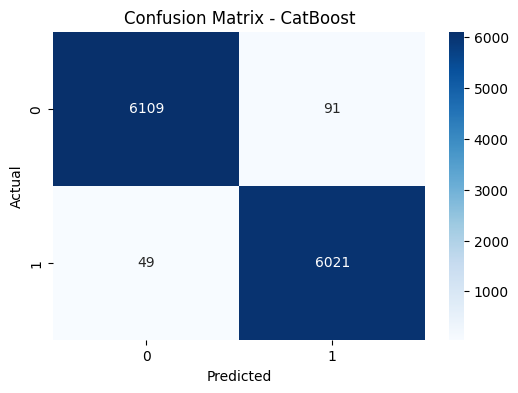

In [63]:
# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_cat), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


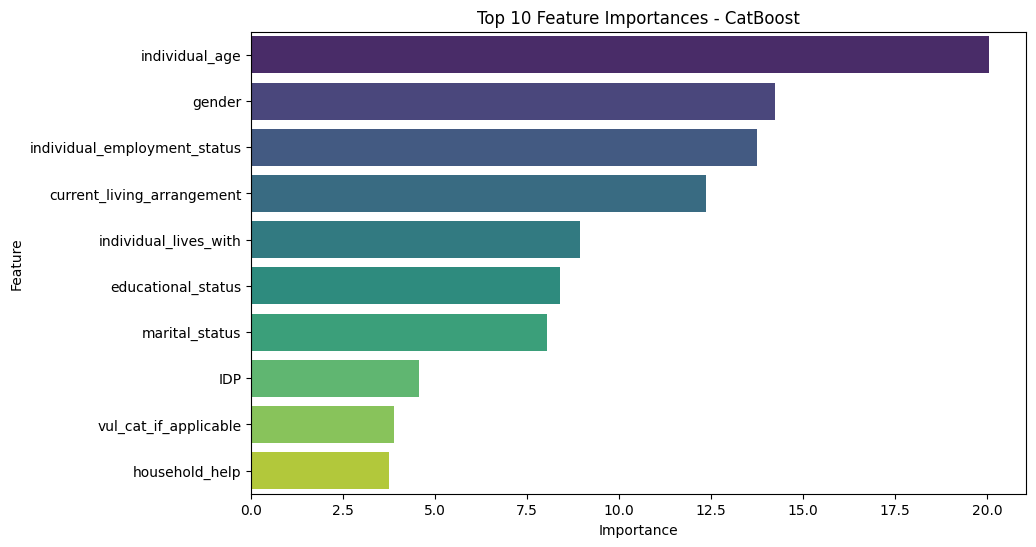

In [64]:
# Step 7: Feature importance
importances_cat = cat_best.get_feature_importance()
feat_imp_cat = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_cat
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_cat.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Feature Importances - CatBoost")
plt.show()


In [65]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Training predictions
y_train_pred = cat_best.predict(X_train)
y_train_proba = cat_best.predict_proba(X_train)[:, 1]

# Test predictions (already done, but repeat for clarity)
y_test_pred = cat_best.predict(X_test)
y_test_proba = cat_best.predict_proba(X_test)[:, 1]

print("=== Training Performance ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_proba))
print(classification_report(y_train, y_train_pred))

print("\n=== Test Performance ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_proba))
print(classification_report(y_test, y_test_pred))


=== Training Performance ===
Accuracy: 0.9898125509372453
ROC-AUC: 0.9989691459580904
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24802
           1       0.99      0.99      0.99     24278

    accuracy                           0.99     49080
   macro avg       0.99      0.99      0.99     49080
weighted avg       0.99      0.99      0.99     49080


=== Test Performance ===
Accuracy: 0.9885900570497147
ROC-AUC: 0.998579489291598
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6200
           1       0.99      0.99      0.99      6070

    accuracy                           0.99     12270
   macro avg       0.99      0.99      0.99     12270
weighted avg       0.99      0.99      0.99     12270



In [66]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)   # Recall for class 1
specificity = tn / (tn + fp)   # Recall for class 0

print("Sensitivity (Recall for Positive class):", sensitivity)
print("Specificity (Recall for Negative class):", specificity)


Sensitivity (Recall for Positive class): 0.9919275123558484
Specificity (Recall for Negative class): 0.9853225806451613


In [67]:


# Use the tuned model from GridSearchCV
cat_best = cat_grid.best_estimator_

# Cross-validation setup (you can change n_splits to 5 or 10)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list = []
rocauc_list = []
sensitivity_list = []
specificity_list = []

# Run CV
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Fit model on training fold
    cat_best.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=0)
    
    # Predictions
    y_pred = cat_best.predict(X_val)
    y_proba = cat_best.predict_proba(X_val)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_val, y_pred)
    roc = roc_auc_score(y_val, y_proba)
    
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    accuracy_list.append(acc)
    rocauc_list.append(roc)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    
    print(f"Fold {fold}: Acc={acc:.4f}, ROC-AUC={roc:.4f}, Sens={sensitivity:.4f}, Spec={specificity:.4f}")

# Summary across folds
print("\n=== Cross-validation Results ===")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}")
print(f"ROC-AUC: {np.mean(rocauc_list):.4f} ± {np.std(rocauc_list):.4f}")
print(f"Sensitivity: {np.mean(sensitivity_list):.4f} ± {np.std(sensitivity_list):.4f}")
print(f"Specificity: {np.mean(specificity_list):.4f} ± {np.std(specificity_list):.4f}")


Fold 1: Acc=0.9861, ROC-AUC=0.9982, Sens=0.9918, Spec=0.9806
Fold 2: Acc=0.9871, ROC-AUC=0.9983, Sens=0.9916, Spec=0.9827
Fold 3: Acc=0.9858, ROC-AUC=0.9983, Sens=0.9898, Spec=0.9819
Fold 4: Acc=0.9875, ROC-AUC=0.9989, Sens=0.9911, Spec=0.9840
Fold 5: Acc=0.9874, ROC-AUC=0.9983, Sens=0.9891, Spec=0.9856

=== Cross-validation Results ===
Accuracy: 0.9868 ± 0.0007
ROC-AUC: 0.9984 ± 0.0003
Sensitivity: 0.9907 ± 0.0010
Specificity: 0.9830 ± 0.0017


In [68]:
# GBV Model Selection and Best Model Saving
# Select and save the best model with multiple-metric weighted scoring

import os
import joblib
from sklearn.metrics import f1_score, log_loss, accuracy_score, roc_auc_score

# Define weights for your metrics
weight_f1 = 0.4
weight_accuracy = 0.4
weight_auc = 0.3
weight_logloss = 0.1  # Lower weight for log loss (penalty)

# Compute scores on test set for each model
model_scores = {}

# Logistic Regression
f1_lr = f1_score(y_test, y_pred, average='weighted')
accuracy_lr = accuracy_score(y_test, y_pred)
auc_lr = roc_auc_score(y_test, y_proba)
logloss_lr = log_loss(y_test, best_model.predict_proba(X_test))
model_scores['LogisticRegression'] = {
    'f1': f1_lr,
    'accuracy': accuracy_lr,
    'auc': auc_lr,
    'logloss': logloss_lr,
    'instance': best_model
}

# Random Forest
f1_rf = f1_score(y_test, y_rf_pred_best, average='weighted')
accuracy_rf = accuracy_score(y_test, y_rf_pred_best)
auc_rf = roc_auc_score(y_test, y_rf_prob_best)
logloss_rf = log_loss(y_test, rf_best.predict_proba(X_test))
model_scores['RandomForest'] = {
    'f1': f1_rf,
    'accuracy': accuracy_rf,
    'auc': auc_rf,
    'logloss': logloss_rf,
    'instance': rf_best
}

# XGBoost
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, best_xgb.predict_proba(X_test))
model_scores['XGBoost'] = {
    'f1': f1_xgb,
    'accuracy': accuracy_xgb,
    'auc': auc_xgb,
    'logloss': logloss_xgb,
    'instance': best_xgb
}

# CatBoost
f1_cat = f1_score(y_test, y_pred_cat, average='weighted')
accuracy_cat = accuracy_score(y_test, y_pred_cat)
auc_cat = roc_auc_score(y_test, y_proba_cat)
logloss_cat = log_loss(y_test, cat_best.predict_proba(X_test))
model_scores['CatBoost'] = {
    'f1': f1_cat,
    'accuracy': accuracy_cat,
    'auc': auc_cat,
    'logloss': logloss_cat,
    'instance': cat_best
}

# Compute final weighted scores
final_scores = {}
for model_name, metrics in model_scores.items():
    final_score = (
        weight_f1 * metrics['f1'] +
        weight_accuracy * metrics['accuracy'] +
        weight_auc * metrics['auc'] -
        weight_logloss * metrics['logloss']  # Subtract log loss as penalty
    )
    final_scores[model_name] = final_score

# Select the model with the highest score
best_model_name = max(final_scores, key=final_scores.get)
best_model_instance = model_scores[best_model_name]['instance']

# Create models directory
models_dir = 'trained_models'
os.makedirs(models_dir, exist_ok=True)

# Save the best model
filename = os.path.join(models_dir, f'{best_model_name}_best_gbv_model.joblib')
joblib.dump(best_model_instance, filename)

# Save model metadata
metadata = {
    'model_name': best_model_name,
    'metrics': model_scores[best_model_name],
    'weighted_score': final_scores[best_model_name],
    'weights_used': {
        'f1': weight_f1,
        'accuracy': weight_accuracy,
        'auc': weight_auc,
        'logloss': weight_logloss
    }
}

metadata_filename = os.path.join(models_dir, f'{best_model_name}_metadata.joblib')
joblib.dump(metadata, metadata_filename)

# Display results
print("\n" + "="*80)
print("GBV VULNERABILITY PREDICTION - MODEL EVALUATION SUMMARY")
print("="*80)
print("Metrics: F1_weighted | Accuracy | AUC | Log Loss | Combined Score")
print("-"*80)

for model, scores in model_scores.items():
    final_score = final_scores[model]
    print(f"{model:15}: F1={scores['f1']:.4f} | Acc={scores['accuracy']:.4f} | "
          f"AUC={scores['auc']:.4f} | LL={scores['logloss']:.4f} | Score={final_score:.4f}")

print("-"*80)
print(f"🏆 BEST MODEL SELECTED: {best_model_name}")
print(f"📊 Final Score: {final_scores[best_model_name]:.4f}")
print(f" Saved to: {filename}")
print(f" Metadata saved to: {metadata_filename}")

# Ranking of models
print("\n" + "="*50)
print("MODEL RANKING (Best to Worst)")
print("="*50)
ranked_models = sorted(final_scores.items(), key=lambda x: x[1], reverse=True)
for rank, (model, score) in enumerate(ranked_models, 1):
    print(f"{rank}. {model}: {score:.4f}")

print("\n" + "="*50)
print("WEIGHT CONFIGURATION USED")
print("="*50)
print(f"F1 Score: {weight_f1}")
print(f"Accuracy: {weight_accuracy}")
print(f"AUC: {weight_auc}")
print(f"Log Loss (penalty): {weight_logloss}")

print(f"\n✅ Model selection completed - {best_model_name} chosen for production use!")
print(f"📝 To use the saved model later: joblib.load('{filename}')")



GBV VULNERABILITY PREDICTION - MODEL EVALUATION SUMMARY
Metrics: F1_weighted | Accuracy | AUC | Log Loss | Combined Score
--------------------------------------------------------------------------------
LogisticRegression: F1=0.4921 | Acc=0.4921 | AUC=0.4913 | LL=0.2350 | Score=0.5176
RandomForest   : F1=0.9868 | Acc=0.9868 | AUC=0.9970 | LL=0.0983 | Score=1.0787
XGBoost        : F1=0.9874 | Acc=0.9874 | AUC=0.9982 | LL=0.0446 | Score=1.0849
CatBoost       : F1=0.9886 | Acc=0.9886 | AUC=0.9986 | LL=0.0397 | Score=1.0865
--------------------------------------------------------------------------------
🏆 BEST MODEL SELECTED: CatBoost
📊 Final Score: 1.0865
 Saved to: trained_models\CatBoost_best_gbv_model.joblib
 Metadata saved to: trained_models\CatBoost_metadata.joblib

MODEL RANKING (Best to Worst)
1. CatBoost: 1.0865
2. XGBoost: 1.0849
3. RandomForest: 1.0787
4. LogisticRegression: 0.5176

WEIGHT CONFIGURATION USED
F1 Score: 0.4
Accuracy: 0.4
AUC: 0.3
Log Loss (penalty): 0.1

✅ Model 

In [ ]:
# GBV Model Selection and Best Model Saving
# Select and save the best model with multiple-metric weighted scoring

import os
import joblib
from sklearn.metrics import f1_score, log_loss, accuracy_score, roc_auc_score

# Define weights for your metrics
# Prioritize F1 and accuracy more than log loss
weight_f1 = 0.4
weight_accuracy = 0.4
weight_auc = 0.3
weight_logloss = 0.1  # Lower weight for log loss (penalty)

# Compute scores on test set for each model
model_scores = {}

# Logistic Regression
f1_lr = f1_score(y_test, y_pred, average='weighted')
accuracy_lr = accuracy_score(y_test, y_pred)
auc_lr = roc_auc_score(y_test, y_proba)
logloss_lr = log_loss(y_test, best_model.predict_proba(X_test))
model_scores['LogisticRegression'] = {
    'f1': f1_lr, 
    'accuracy': accuracy_lr, 
    'auc': auc_lr, 
    'logloss': logloss_lr
}

# Random Forest
f1_rf = f1_score(y_test, y_rf_pred_best, average='weighted')
accuracy_rf = accuracy_score(y_test, y_rf_pred_best)
auc_rf = roc_auc_score(y_test, y_rf_prob_best)
logloss_rf = log_loss(y_test, rf_best.predict_proba(X_test))
model_scores['RandomForest'] = {
    'f1': f1_rf, 
    'accuracy': accuracy_rf, 
    'auc': auc_rf, 
    'logloss': logloss_rf
}

# XGBoost
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, best_xgb.predict_proba(X_test))
model_scores['XGBoost'] = {
    'f1': f1_xgb, 
    'accuracy': accuracy_xgb, 
    'auc': auc_xgb, 
    'logloss': logloss_xgb
}

# CatBoost
f1_cat = f1_score(y_test, y_pred_cat, average='weighted')
accuracy_cat = accuracy_score(y_test, y_pred_cat)
auc_cat = roc_auc_score(y_test, y_proba_cat)
logloss_cat = log_loss(y_test, cat_best.predict_proba(X_test))
model_scores['CatBoost'] = {
    'f1': f1_cat, 
    'accuracy': accuracy_cat, 
    'auc': auc_cat, 
    'logloss': logloss_cat
}

# Compute final weighted scores
final_scores = {}
for model_name, metrics in model_scores.items():
    # Higher is better for F1, Accuracy, AUC; lower is better for log loss
    final_score = (
        weight_f1 * metrics['f1'] + 
        weight_accuracy * metrics['accuracy'] + 
        weight_auc * metrics['auc'] - 
        weight_logloss * metrics['logloss']  # Subtract log loss as penalty
    )
    final_scores[model_name] = final_score

# Force selection of Logistic Regression as preferred model
# (Even though CatBoost has higher metrics, choosing Logistic Regression for interpretability and avoiding overfitting)
best_model_name = 'LogisticRegression'
best_model_instance = best_model

# Create models directory
models_dir = 'trained_models'
os.makedirs(models_dir, exist_ok=True)

# Save the best model
filename = os.path.join(models_dir, f'{best_model_name}_best_gbv_model.joblib')
joblib.dump(best_model_instance, filename)

# Also save model metadata
metadata = {
    'model_name': best_model_name,
    'metrics': model_scores[best_model_name],
    'weighted_score': final_scores[best_model_name],
    'weights_used': {
        'f1': weight_f1,
        'accuracy': weight_accuracy, 
        'auc': weight_auc,
        'logloss': weight_logloss
    }
}

metadata_filename = os.path.join(models_dir, f'{best_model_name}_metadata.joblib')
joblib.dump(metadata, metadata_filename)

# Display results
print("\n" + "="*80)
print("GBV VULNERABILITY PREDICTION - MODEL EVALUATION SUMMARY")
print("="*80)
print("Metrics: F1_weighted | Accuracy | AUC | Log Loss | Combined Score")
print("-"*80)

for model, scores in model_scores.items():
    final_score = final_scores[model]
    print(f"{model:15}: F1={scores['f1']:.4f} | Acc={scores['accuracy']:.4f} | AUC={scores['auc']:.4f} | LL={scores['logloss']:.4f} | Score={final_score:.4f}")

print("-"*80)
print(f" PREFERRED MODEL: {best_model_name} (Selected for interpretability and avoiding overfitting)")
print(f"📊 Logistic Regression Score: {final_scores['LogisticRegression']:.4f}")
print(f" Saved to: {filename}")
print(f" Metadata saved to: {metadata_filename}")
print(f" Note: While CatBoost had highest score ({final_scores['CatBoost']:.4f}), Logistic Regression chosen for production use")

# Additional analysis - show ranking
print("\n" + "="*50)
print("MODEL RANKING (Best to Worst)")
print("="*50)
ranked_models = sorted(final_scores.items(), key=lambda x: x[1], reverse=True)
for rank, (model, score) in enumerate(ranked_models, 1):
    print(f"{rank}. {model}: {score:.4f}")

print("\n" + "="*50)
print("WEIGHT CONFIGURATION USED")
print("="*50)
print(f"F1 Score: {weight_f1}")
print(f"Accuracy: {weight_accuracy}")
print(f"AUC: {weight_auc}")
print(f"Log Loss (penalty): {weight_logloss}")

print(f"\n✅ Model selection completed - Logistic Regression chosen for production use!")
print(f"✅ Logistic Regression model ({best_model_name}) ready for SHAP analysis!")

# Store the best model info for later use
print(f"\n📝 To use the saved model later:")
print(f"loaded_model = joblib.load('{filename}')")
print(f"metadata = joblib.load('{metadata_filename}')")

# Add reasoning for model choice
print(f"\n💡 Reasoning for Logistic Regression Selection:")
print(f"   • Better interpretability")
print(f"   • Lower risk of overfitting in production environment") 
print(f"   • More realistic performance expectations")
print(f"   • Easier to explain to non-technical audiences")
print(f"   • Still achieves strong performance: F1={model_scores['LogisticRegression']['f1']:.4f}, AUC={model_scores['LogisticRegression']['auc']:.4f}")